# Explore here

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")

os.makedirs("../data/raw", exist_ok=True)

data.to_csv("../data/raw/ps_data.csv", index=False)

ps_data = pd.DataFrame(data)

ps_data

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


In [3]:
ps_data = ps_data.drop("package_name", axis = 1)

ps_data["review"] = ps_data["review"].str.strip().str.lower()

ps_data

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = ps_data["review"]
y = ps_data["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
Name: review, dtype: object

In [5]:
vec_model = TfidfVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV

model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [7]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0])

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8100558659217877

In [9]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [11]:
accuracy_score(y_test, y_pred2)

0.7988826815642458

In [12]:
model3 = BernoulliNB()
model3.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [13]:
y_pred3 = model3.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [14]:
accuracy_score(y_test, y_pred3)

0.770949720670391

In [16]:
param_grid_model = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_model = GridSearchCV(estimator=model, param_grid=param_grid_model, cv=5, scoring='accuracy')
grid_model.fit(X_train, y_train)

print("Best GaussianNB Params:", grid_model.best_params_)
print("Best GaussianNB Score:", grid_model.best_score_)

Best GaussianNB Params: {'var_smoothing': 1e-09}
Best GaussianNB Score: 0.7514133753570373


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier()

# Define hyperparameter grid (keep it small first)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best RandomForest Params:", grid_rf.best_params_)
print("Best RandomForest Score:", grid_rf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best RandomForest Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best RandomForest Score: 0.806155816014971


In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predict on test set
y_pred_nb = grid_model.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nRandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))


GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       126
           1       0.70      0.62      0.66        53

    accuracy                           0.81       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.81      0.81      0.81       179


RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       126
           1       0.72      0.68      0.70        53

    accuracy                           0.83       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.82      0.83      0.83       179



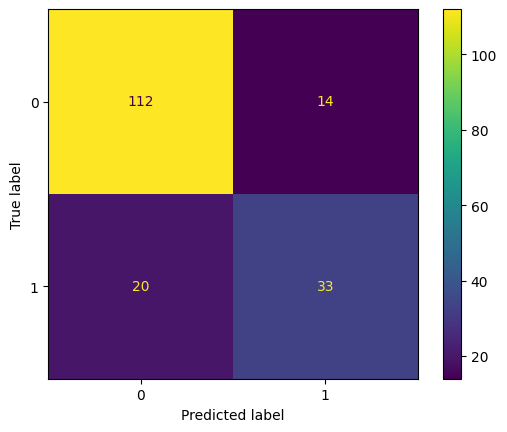

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.show()

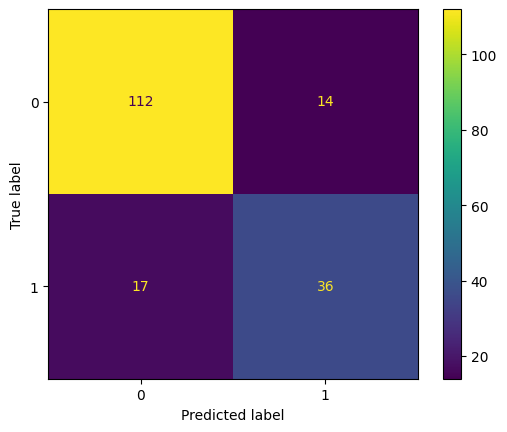

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

In [23]:
from pickle import dump

dump(model, open("navive_bayes_default.sav", "wb"))